In [1]:
from sklearn.datasets import fetch_openml

mnist_= fetch_openml("mnist_784", version=1)

In [2]:
X, y = mnist_["data"], mnist_["target"]
X[0] #This is our instance's feature vector
some_digit = X[0] 
some_digit_img = some_digit.reshape(28,28) #convert our vector into a matrix 
some_digit_img



array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

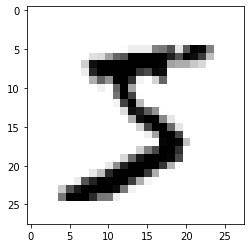

'5'

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(some_digit_img, cmap="binary")
plt.show()
y[0]

In [4]:
import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]



In [5]:
#Training a Binary classifier
#we want to know if the number is 5 or not 5

#Target vectors
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#Let's use a Sctochastic Gradient desceny (SGD) classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) #Instance the SGDClassifier
sgd_clf.fit(X_train, y_train_5) #We train our model 



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
#Let's predict!
sgd_clf.predict([some_digit]) #Our some_digit variable is 5

array([ True])

In [18]:
#Preformance Measures

#Measuring accuracy using cross-validaition 

#Let's implement cross-validation roughly 
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfold = StratifiedKFold(n_splits=3, random_state=42)

#skfold.split() returns arrays of indexes!
#In this case skfold.split will split our data 3 times, each one with a
#different combination of indexes 
a, b, c = skfold.split(X_train, y_train_5) #a, b and c have two arrays
                                           #one of the indexes of train split
                                           #one of indexes of test split


for train_idx, test_idx in skfold.split(X_train, y_train_5):
    
  
    X_train_fold = X_train[train_idx]
    y_train_fold = y_train_5[train_idx]
    
    X_test_fold = X_train[test_idx]
    y_test_fold = y_train[test_idx]
    
    sgd_clf_clone = clone(sgd_clf)
    sgd_clf_clone.fit(X_train_fold, y_train_fold)
    y_pred = sgd_clf_clone.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


(array([19964, 19965, 19966, ..., 59997, 59998, 59999]), array([    0,     1,     2, ..., 20331, 20342, 20359]))
(array([    0,     1,     2, ..., 59997, 59998, 59999]), array([19964, 19965, 19966, ..., 40088, 40125, 40127]))
(array([    0,     1,     2, ..., 40088, 40125, 40127]), array([39988, 39989, 39990, ..., 59997, 59998, 59999]))
0.09925
0.09675
0.10035


In [19]:
#Let's use cross_val_score() to evaluate SGDClassifier model

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [21]:
#let's look at a dumb classifier that classifies every image as not 5
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])